
# Pré-Processamento: Processamento de Dados e Preparação do Dataset

## Objetivo
  A apartir de um conjunto de dados não tratados referente às receitas de uma loja de desporto, efetuar as associações necessárias, eliminando toda a informação considerada desnecessária para o âmbito do nosso projeto, gerando um dataset final a ser, posteriormente, importado no pré-processamento de dados. 


In [1]:
%pip install pandas
%pip install xlrd
%pip install openpyxl
%pip install unidecode
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset/sales.csv')


C:\Users\silve\AppData\Local\Temp\ipykernel_17308\1947858182.py:4: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/sales.csv')


In [3]:

# Verificamos o dataset carregado
print(df.head(5))



  product_id store_id        date  sales  revenue  stock  price promo_type_1  \
0      P0001    S0002  2017-01-02    0.0     0.00    8.0   6.25         PR14   
1      P0001    S0012  2017-01-02    1.0     5.30    0.0   6.25         PR14   
2      P0001    S0013  2017-01-02    2.0    10.59    0.0   6.25         PR14   
3      P0001    S0023  2017-01-02    0.0     0.00    6.0   6.25         PR14   
4      P0001    S0025  2017-01-02    0.0     0.00    1.0   6.25         PR14   

  promo_bin_1 promo_type_2 promo_bin_2  promo_discount_2 promo_discount_type_2  
0         NaN         PR03         NaN               NaN                   NaN  
1         NaN         PR03         NaN               NaN                   NaN  
2         NaN         PR03         NaN               NaN                   NaN  
3         NaN         PR03         NaN               NaN                   NaN  
4         NaN         PR03         NaN               NaN                   NaN  


In [88]:

# Verificamos o período do dataset
def sales_duration(data):
    data.date = pd.to_datetime(data.date)
    number_of_days = data.date.max() - data.date.min()
    number_of_years = number_of_days.days / 365
    print(number_of_days.days, 'dias')
    print(number_of_years, 'anos')
    
sales_duration(df)


1091 dias
2.989041095890411 anos


In [10]:

# Verificamos que cada produto tem vários registos por dia, dado que para cada produto existem mais registos do que o total de dias acima ilustrado, sendo estes
# referentes às diferentes lojas em que foram vendidos. Porém, para efeitos de análise, iremos agrupar as vendas diárias de cada produto em todas as lojas numa só linha.
print(df['product_id'].value_counts().sort_values(ascending=False).head(15))



P0125    140997
P0364    140569
P0261    139651
P0333    139632
P0664    139486
P0390    139332
P0131    139014
P0536    138856
P0499    138228
P0116    137142
P0569    137132
P0372    136738
P0103    135841
P0642    134062
P0129    133990
Name: product_id, dtype: int64


In [19]:


# Verificamos as percentagens de dados em falta
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False).head()



promo_bin_2              99.696317
promo_discount_2         99.696317
promo_discount_type_2    99.696317
promo_bin_1              86.370028
sales                     6.120647
dtype: float64

In [35]:


# Verificamos a distribuição das colunas de valores de promoção que estão preenchidas
print(df[df['product_id'] == 'P0004']['promo_type_1'].value_counts().sort_values(ascending=False).head(15))



KeyError: 'promo_type_1'

In [ ]:


# Verificamos a distribuição das colunas de valores de promoção que estão preenchidas
print(df[df['product_id'] == 'P0004']['promo_type_2'].value_counts().sort_values(ascending=False).head(15))



In [34]:


# Removemos as colunas cujas percentagens de inutilização são evidentemente superiores ao aceitável
df = df.drop(columns=["promo_bin_2", "promo_discount_2", "promo_discount_type_2", "promo_bin_1"])

# Removemos as colunas cuja distribuição é quase 100% para um determinado valor, dado que não terão impacto no modelo
df = df.drop(columns=["promo_type_1","promo_type_2"])
print(df.head(5))



  product_id store_id        date  sales  revenue  stock  price
0      P0001    S0002  2017-01-02    0.0     0.00    8.0   6.25
1      P0001    S0012  2017-01-02    1.0     5.30    0.0   6.25
2      P0001    S0013  2017-01-02    2.0    10.59    0.0   6.25
3      P0001    S0023  2017-01-02    0.0     0.00    6.0   6.25
4      P0001    S0025  2017-01-02    0.0     0.00    1.0   6.25


In [46]:


# Verificamos novamente as percentagens de dados em falta
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False).head()



sales         6.120647
revenue       6.120647
stock         6.120647
price         2.940045
product_id    0.000000
dtype: float64

In [41]:


# Agrupamos as vendas diárias por produto. 
# Para manter o preço diário de cada produto, como este pode variar de loja para loja, inferimos a média do preço diário de cada produto entre todas as lojas.
df2 = df.groupby(["product_id", "date"]).agg({'sales': ['sum'], 'revenue': ['sum'], 'stock': ['sum'], 'price': ['mean']}).reset_index()
df2.columns = df2.columns.droplevel(1)

print(df2.head(15))



   product_id        date  sales  revenue  stock  price
0       P0001  2017-01-02    6.0    31.79  195.0   6.25
1       P0001  2017-01-03    1.0     5.30  194.0   6.25
2       P0001  2017-01-04    2.0    10.60  192.0   6.25
3       P0001  2017-01-05    1.0     5.30  191.0   6.25
4       P0001  2017-01-06    3.0    15.90  188.0   6.25
5       P0001  2017-01-07    9.0    47.68  180.0   6.25
6       P0001  2017-01-08    2.0    10.60  178.0   6.25
7       P0001  2017-01-09    1.0     5.30  177.0   6.25
8       P0001  2017-01-10    1.0     5.30  176.0   6.25
9       P0001  2017-01-11    4.0    21.20  173.0   6.25
10      P0001  2017-01-12    3.0    15.90  168.0   6.25
11      P0001  2017-01-13    4.0    21.19  164.0   6.25
12      P0001  2017-01-14    4.0    22.04  160.0   6.50
13      P0001  2017-01-15    4.0    22.04  156.0   6.50
14      P0001  2017-01-16    1.0     5.51  155.0   6.50


In [53]:

# Verificamos novamente a quantidade de registos por produto, sendo que este valor deverá diminuir drasticamente face à análise igual feita anteriormente
# Assim, a quantidade agora deverá ser igual para todos os produtos, tendo como valor o total de dias do dataset previamente visto.
print(df2['product_id'].value_counts().sort_values(ascending=False).head(15))



P0001    1092
P0705    1092
P0372    1092
P0611    1092
P0534    1092
P0609    1092
P0608    1092
P0602    1092
P0599    1092
P0591    1092
P0590    1092
P0587    1092
P0585    1092
P0583    1092
P0579    1092
Name: product_id, dtype: int64


In [44]:

# Exportamos o Dataset já agrupado caso seja pretendido analisar os dados ao pormenor. (opcional)
#df2.to_csv('dataset/sales_grouped.csv')



In [49]:


# Verificamos novamente as percentagens de dados em falta, já com as vendas agrupadas
percent_missing = df2.isnull().sum() * 100 / len(df2)
percent_missing.sort_values(ascending=False).head()



price         1.873005
product_id    0.000000
date          0.000000
sales         0.000000
revenue       0.000000
dtype: float64

In [68]:

def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values


In [74]:


tukey_indices, tukey_values = find_outliers_tukey(df2['price'])
print(np.sort(tukey_values))



[]


In [75]:


# Utilizamos pyplot em matplotlib para criar plot histograms
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

    

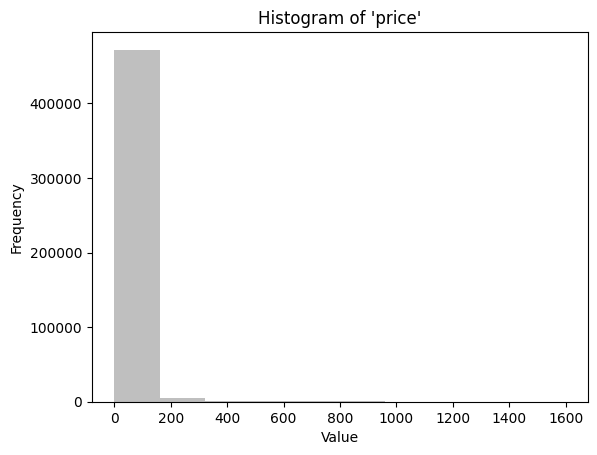

In [76]:

plot_histogram(df2['price'])


In [81]:


# Dividimos o dataframe por produto, dado que irá ser treinado um modelo de previsão para cada um.
dfByProdList = df2.groupby("product_id")

print(len(dfByProdList))

    

649


In [84]:

# Para efeitos de análise, iremos inicialmente começar por criar um modelo somente para um produto.
product_df = dfByProdList.get_group('P0001')
print(product_df.head())




  product_id        date  sales  revenue  stock  price
0      P0001  2017-01-02    6.0    31.79  195.0   6.25
1      P0001  2017-01-03    1.0     5.30  194.0   6.25
2      P0001  2017-01-04    2.0    10.60  192.0   6.25
3      P0001  2017-01-05    1.0     5.30  191.0   6.25
4      P0001  2017-01-06    3.0    15.90  188.0   6.25


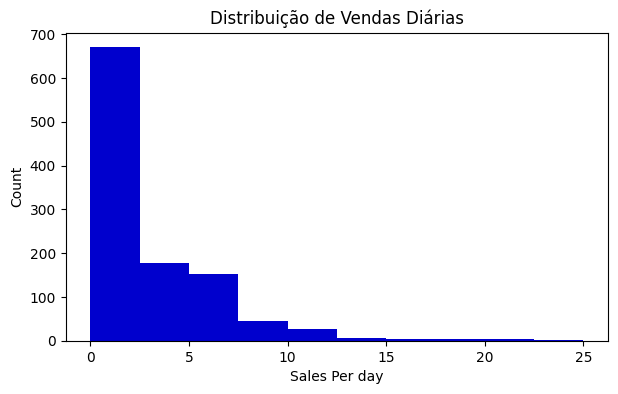

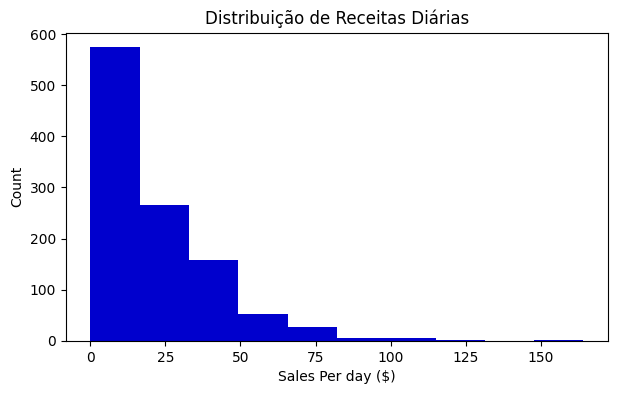

In [96]:


# Verificamos a distribuição de vendas diárias para este produto
def sales_per_day(product_sales_data):
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(product_sales_data.sales, color='mediumblue')
    
    ax.set(xlabel = "Sales Per day",
           ylabel = "Count",
           title = "Distribuição de Vendas Diárias")
    
def revenue_per_day(product_sales_data):
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(product_sales_data.revenue, color='mediumblue')
    
    ax.set(xlabel = "Sales Per day ($)",
           ylabel = "Count",
           title = "Distribuição de Receitas Diárias")
    
sales_per_day(product_df)
revenue_per_day(product_df)



In [94]:


# Verificamos a média de vendas e receitas diárias
avg_monthly_sales = product_df.sales.mean()
avg_monthly_revenue = product_df.revenue.mean()
print(f"Média de vendas diárias: {avg_monthly_sales}")
print(f"Média de receitas diárias: ${avg_monthly_revenue}")



Média de vendas diárias: 2.718864468864469
Média de receitas diárias: $19.34838827838828


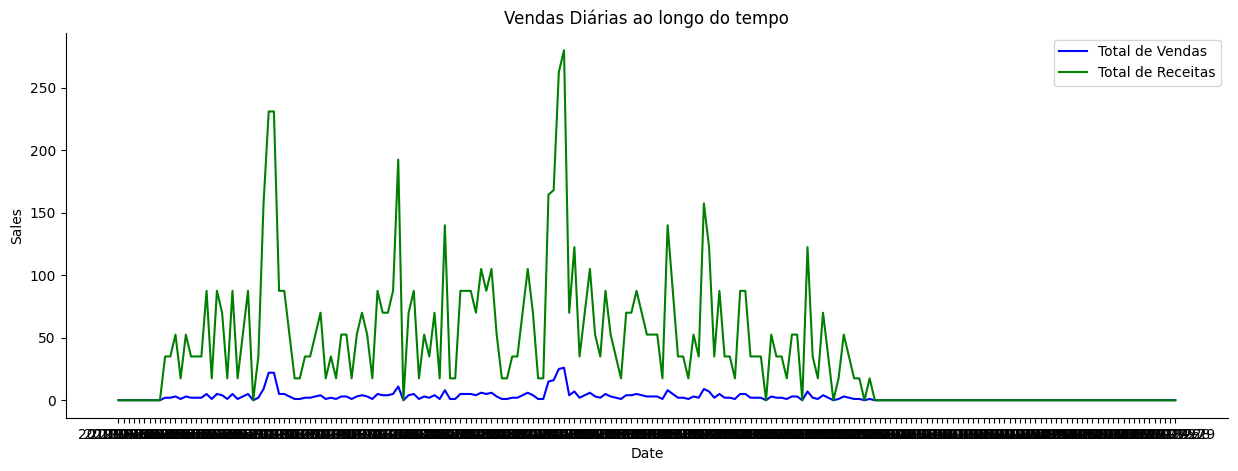

In [113]:

def time_plot(data, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x = 'date', y = 'sales', data=data, ax=ax, color='blue', label='Total de Vendas')
    sns.lineplot(x = 'date', y = 'revenue', data=data, ax=ax, color='green', label='Total de Receitas') 
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = title)
    
    sns.despine()
    
# Verificamos o histórico de vendas diárias do produto ao longo do tempo
time_plot(product_df, 'Vendas Diárias ao longo do tempo')


In [98]:


# Iteramos a lista de dataframes
for name, group in dfByProdList:
    product_df = group
    #print(name)
    # You can now access the data for each group using the product_df dataframe



In [24]:


# Use PolynomialFeatures in sklearn.preprocessing to create two-way interactions for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df



In [25]:

# Assign X as a DataFrame of features and y as a Series of the outcome variable
df = add_interactions(df)
print(df.head(5))



   Total_Receitas_2018Q1  Total_Receitas_2018Q2  Total_Receitas_2018Q3  \
0               0.000000               0.000000               0.000000   
1             176.666667             294.444444              88.333333   
2               0.000000               0.000000               0.000000   
3               0.000000               0.000000               0.000000   
4             410.425926              99.833333              88.740741   

   Total_Receitas_2018Q4  Total_Receitas_2019Q1  Total_Receitas_2019Q2  \
0               0.027778               0.009259               0.000000   
1             265.000000             294.444444             176.666667   
2              22.037037              44.074074               0.000000   
3              47.962963               0.000000               0.000000   
4             155.296296             166.388889              77.648148   

   Total_Receitas_2019Q3  Total_Receitas_2019Q4  Total_Receitas_2020Q1  \
0               0.018519            

In [28]:


X = df.drop('Total_Receitas_2022Q4', 1)
Y = df.Total_Receitas_2022Q4



C:\Users\silve\AppData\Local\Temp\ipykernel_7132\3779654755.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Total_Receitas_2022Q4', 1)


In [31]:




# Use train_test_split in sklearn.cross_validation to split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, random_state=1)




In [33]:



# The total number of features have grown substantially after dummying and adding interaction terms
print(df.shape)
print(X.shape)



(10845, 14984)
(10845, 14983)


In [34]:




# Such a large set of features can cause overfitting and also slow computing
# Use feature selection to select the most important features
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]



C:\Users\silve\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   44    52    62 ... 14882 14884 14952] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\silve\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\silve\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [35]:




print(colnames_selected)




['NomeMarca_Produto_ADIDAS_Tipo_TENIS', 'NomeMarca_Produto_BULLTERRIER_Estação_INVERNO', 'NomeMarca_Produto_DWJ_Tipo_SACO', 'NomeMarca_Produto_FORT SPUMA_Género_MASCULINO', 'NomeMarca_Produto_MACBOOT_Unidade_Produto_UN', 'NomeMarca_Produto_PENALTY_Tipo_FAIXA', 'NomeMarca_Produto_PENALTY_Tipo_LUVA MUSCULAÇÃO', 'NomeMarca_Produto_PENALTY_Tipo_VALVULA', 'NomeMarca_Produto_REALTEX_Tipo_LUVA', 'NomeMarca_Produto_ROLA MOCA_Tipo_BERMUDA', 'NomeMarca_Produto_SCALIBU_Tipo_AGULHA', 'NomeMarca_Produto_WILSON_Tipo_BOLA TÊNIS', 'Tipo_BERMUDA_Unidade_Produto_PR', 'Tipo_CHUTEIRA CAMPO_Segmento_GERAL', 'Tipo_TENIS_Género_GERAL', 'Tipo_VALVULA_Unidade_Produto_UN', 'Tipo_VALVULA_Negócio_ACESSÓRIOS', 'Tipo_VALVULA_Segmento_ESPORTIVO', 'Tipo_VALVULA_Género_GERAL', 'Tipo_VALVULA_Estação_ANUAL']


In [36]:


# Function to build model and find model performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc



In [37]:


# Find performance of model using preprocessed data
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)



ValueError: Unknown label type: 'continuous'

In [39]:
# Drop missing values so model does not throw any error
df_unprocessed = df
df_unprocessed = df_unprocessed.dropna(axis=0, how='any')
print(df.shape)
print(df_unprocessed.shape)

(10845, 14984)
(10845, 14984)


In [44]:
# Remove non-numeric columns so model does not throw an error
for col_name in df_unprocessed.columns:
    if df_unprocessed[col_name].dtypes not in ['int32','int64','float32','float64']:
        df_unprocessed = df_unprocessed.drop(col_name, 1)

C:\Users\silve\AppData\Local\Temp\ipykernel_7132\187425290.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_unprocessed = df_unprocessed.drop(col_name, 1)
C:\Users\silve\AppData\Local\Temp\ipykernel_7132\187425290.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_unprocessed = df_unprocessed.drop(col_name, 1)
C:\Users\silve\AppData\Local\Temp\ipykernel_7132\187425290.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_unprocessed = df_unprocessed.drop(col_name, 1)
C:\Users\silve\AppData\Local\Temp\ipykernel_7132\187425290.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_unprocessed = df_unprocessed.drop(col_name, 1)
C:\U

KeyboardInterrupt: 

In [45]:
# Split into features and outcomes
X_unprocessed = df_unprocessed.drop('Total_Receitas_2022Q4', 1)
y_unprocessed = df_unprocessed.Total_Receitas_2022Q4

C:\Users\silve\AppData\Local\Temp\ipykernel_7132\1969130672.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_unprocessed = df_unprocessed.drop('Total_Receitas_2022Q4', 1)


KeyError: "['Total_Receitas_2022Q4'] not found in axis"

In [46]:
# Take a look again at what the unprocessed feature set looks like
print(X_unprocessed.head(5))

   Total_Receitas_2018Q1  Total_Receitas_2018Q2  Total_Receitas_2018Q3  \
0               0.000000               0.000000               0.000000   
1             176.666667             294.444444              88.333333   
2               0.000000               0.000000               0.000000   
3               0.000000               0.000000               0.000000   
4             410.425926              99.833333              88.740741   

   Total_Receitas_2018Q4  Total_Receitas_2019Q1  Total_Receitas_2019Q2  \
0               0.027778               0.009259               0.000000   
1             265.000000             294.444444             176.666667   
2              22.037037              44.074074               0.000000   
3              47.962963               0.000000               0.000000   
4             155.296296             166.388889              77.648148   

   Total_Receitas_2019Q3  Total_Receitas_2019Q4  Total_Receitas_2020Q1  \
0               0.018519            

In [47]:
# Split unprocessed data into train and test set
# Build model and assess performance
X_train_unprocessed, X_test_unprocessed, y_train, y_test = train_test_split(
    X_unprocessed, y_unprocessed, train_size=0.70, random_state=1)

auc_unprocessed = find_model_perf(X_train_unprocessed, y_train, X_test_unprocessed, y_test)
print(auc_unprocessed)

ValueError: Unknown label type: 'continuous'